In [2]:
import pandas as pd
import matplotlib.pyplot as plt     
import numpy as np

In [3]:
df = pd.read_csv('matchingtablereal.csv')

In [4]:
df.keys() 

Index(['PLATE', 'MJD', 'FIB', 'ra', 'dec', 'z_1', 'Mu', 'Mg', 'Mr', 'Mi', 'Mz',
       'concind', 'stmass', 'sfrmst', 'sfr', 'dn4000', 'bpty', 'bptx', 'bptx2',
       'bptx3', 'SN_Hbeta', 'SN_OIII', 'SN_OI', 'SN_Halpha', 'SN_NII',
       'SN_SII6717', 'SN_SII6731', 'agn_type', 'LumOIII', 'logMBH', 'R',
       'recno', 'Seq', 'RAJ2000', 'DEJ2000', 'z_2', 'rMAG', 'DM', 'g-r', 'dN',
       'gReff', 'rReff', 'ng', 'nr', 'a4', 'n(g-r)', 'logLX', 'dCM',
       'log(sig)', 'logAge', '[Z/H]', '[a/Fe]', 'Flag', 'Separation'],
      dtype='object')

In [5]:
fossil = np.where(df['Flag'] == 2)

In [6]:
df = df.iloc[fossil]

In [94]:
len(df)

17

findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not found.
findfont: Font family 'family' not

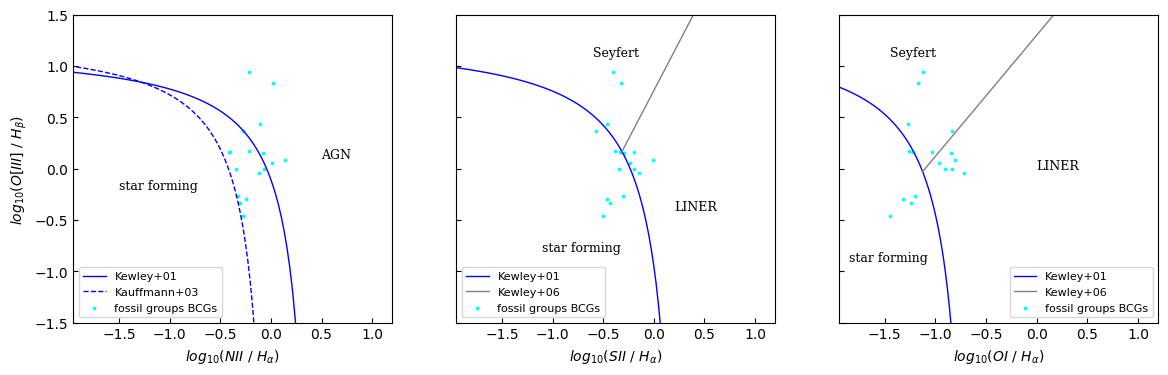

In [7]:
log_NII_Ha = np.linspace(-2.5, 0.3, 100)
log_NII_Ha_Kauffman = np.linspace(-2.5, 0., 100)

log_SII_Ha = np.linspace(-2, 0.3, 100)
log_SII_Ha_kewley = np.linspace(-0.32, 1.2, 100)

log_OI_Ha = np.linspace(-2.5, -0.7, 100)
log_OI_Ha_kewley06 = np.linspace(-1.13, 2.0, 100)

# Ecuaciones para las curvas de Kewley et al. (2001) y las separaciones de Seyfert y LINERs (Kewley 2006) y Kauffmann et al. (2003)
log_OIII_Hb_Kewley = 0.61 / (log_NII_Ha - 0.47) + 1.19 #Kewley+01
log_OIII_Hb_Kauffmann = 0.61 / (log_NII_Ha_Kauffman - 0.05) + 1.30 #Kauffman+03

log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = (1.89 * log_SII_Ha_kewley) + 0.76 #Kewley2006

log_OIII_Hb_OI_Kewley = 0.73 / (log_OI_Ha + 0.59) + 1.33 #kewley
log_OIII_Hb_OI_Seyfert_LINER = (1.18 * log_OI_Ha_kewley06) + 1.30 #kewley+06


fig, axes = plt.subplots(1,3, sharey=True, sharex=True, figsize=(14,4))

# 1 -----------------
"""log_OIII_Hb_SII_Kewley = 0.72 / (log_SII_Ha - 0.32) + 1.30 #Kewley
log_OIII_Hb_SII_Seyfert_LINER = 1.89 * log_SII_Ha + 0.76 #Schawinski+07
"""

# Regions --------------------------------------------
axes[0].plot(log_NII_Ha,   log_OIII_Hb_Kewley, '-' , color='blue', lw=1, label='Kewley+01') # Kewley+01
axes[0].plot(log_NII_Ha_Kauffman, log_OIII_Hb_Kauffmann, '--', color='blue', lw=1, label='Kauffmann+03' ) # Kauffmann+03
axes[0].scatter(df['bptx'],df['bpty'], s=3, color='cyan', label='fossil groups BCGs')
axes[0].set_ylim(-1.5,1.5)
axes[0].set_xlim(-1.2,1.5)
axes[0].tick_params(axis='both', direction='in')
axes[0].text(-1.5, -0.2, 'star forming',fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[0].text(0.5, 0.1, 'AGN',fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[0].set_xlabel('$log_{10}$($NII$ / $ H_{\\alpha}$)')
axes[0].set_ylabel('$log_{10}$($O[III]$ / $ H_{\\beta}$)')
axes[0].legend(loc='lower left', fontsize='8')

# Regions ----

axes[1].plot(log_SII_Ha,   log_OIII_Hb_SII_Kewley, '-' , color='blue', lw=1, label='Kewley+01') # Kewley+01
axes[1].plot(log_SII_Ha_kewley, log_OIII_Hb_SII_Seyfert_LINER, '-', color='gray', lw=1, label='Kewley+06') # Kewley+06


axes[1].scatter(df['bptx2'], df['bpty'], s=3, color='cyan', label='fossil groups BCGs')
axes[1].set_xlabel('$log_{10}$($SII$ / $ H_{\\alpha}$)')
axes[1].set_xlim(-1.95, 1.2)
axes[1].tick_params(axis='both', direction='in')
axes[1].text(-1.1, -0.8, 'star forming',fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[1].text(-0.6, 1.1, 'Seyfert',fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[1].text(0.2, -0.4, 'LINER',fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[1].legend(loc='lower left', fontsize='8')



# Regions --------------------------------------------
axes[2].plot(log_OI_Ha,   log_OIII_Hb_OI_Kewley, '-' , color='blue', lw=1, label='Kewley+01') # Kewley+01
axes[2].plot(log_OI_Ha_kewley06, log_OIII_Hb_OI_Seyfert_LINER, '-', color='gray', lw=1, label='Kewley+06') # Kewley+06

axes[2].scatter(df['bptx3'], df['bpty'], s=3, color='cyan', label='fossil groups BCGs')
axes[2].set_xlabel('$log_{10}$($OI$ / $ H_{\\alpha}$)')
axes[2].tick_params(axis='both' , direction='in')
axes[2].text(-1.85, -0.9, 'star forming', fontsize='9', fontfamily={'family':'serif','serif':['Times']})
axes[2].text(-1.45, 1.1, 'Seyfert',fontsize='9', fontfamily={'family':'serif','serif':['Times']})  
axes[2].text(0, 0, 'LINER',fontsize='9', fontfamily={'family':'serif','serif':['Times']})

axes[2].legend(loc='lower right', fontsize='8')


## Hacer una estadística descriptiva de los tipos de AGN encontrados y sus porcentajes, valores medios de z, Mr y parámetros generales según los datos disponibles del catálogo elegido.

In [9]:
# Source: https://stackoverflow.com/a/33597599/5391200

from pylab import *

cmap = cm.get_cmap('mako', 6)
color_list = [matplotlib.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]
print(color_list)

/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_26572/2025780935.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('mako', 6)


ValueError: 'mako' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

In [10]:
colors= ['#0b0405', '#382a54', '#395d9c', '#3497a9', '#60ceac', '#def5e5']
import seaborn as sns


In [92]:
fig, axes = plt.subplots(1,1,figsize=(8,8))
sns.histplot(ax=axes, x=df['agn_type'], color=colors[2], edgecolor='white', stat='percent', alpha=0.3)
axes.text(100, 5, "Ambigous", color="black", rotation=60, fontfamily='serif')
axes.text(200, 20, 'Composite', color='black', rotation=60, fontfamily='serif')
axes.text(310, 5, 'LINER', color='black', rotation=60, fontfamily='serif')
axes.text(355, 5, 'Seyfert', color='black', rotation=60, fontfamily='serif')
axes.set_xlabel('AGN type', fontfamily='serif')
axes.set_ylim(0,50)

(0.0, 50.0)

In [12]:
#newdf = np.nonzero(df['agn_type'] == '300' | df['agn_type'] == '400')

mask_LINER = df.loc[:, 'agn_type'] == 300
mask_Seyfert = df.loc[:, 'agn_type'] == 400

dfLINER = df[mask_LINER]
dfSeyfert = df[mask_Seyfert]



In [13]:
meanvalues_z = [np.mean(dfLINER['z_1']), np.mean(dfSeyfert['z_1'])]
medianvalues_z = [np.median(dfLINER['z_1']), np.median(dfSeyfert['z_1'])]

meanvalues_Mr = [np.mean(dfLINER['Mr']), np.mean(dfSeyfert['Mr'])]
medianvalues_Mr = [np.median(dfLINER['Mr']), np.median(dfSeyfert['Mr'])]


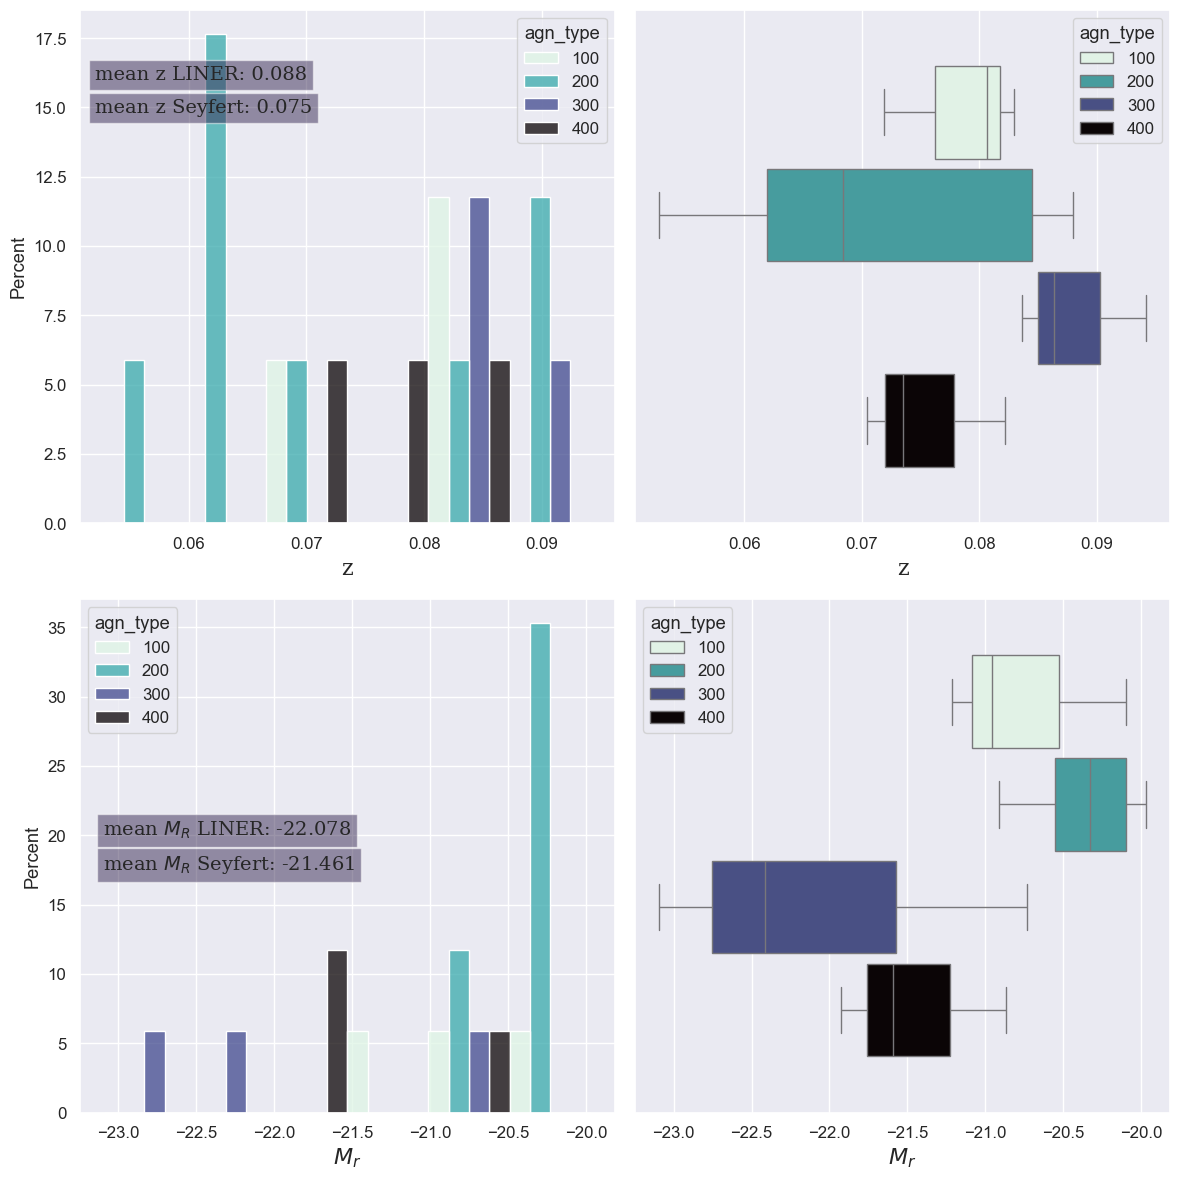

In [27]:
sns.set_theme(style='darkgrid' ,font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(12,12))

sns.histplot(ax=axes[0][0], x=df['z_1'], hue=df['agn_type'], stat='percent', multiple='dodge', palette='mako_r', edgecolor='white')
axes[0][0].set_xlabel('z', fontfamily='serif', fontsize=16)
axes[0][0].text(0.052, 16, f'mean z LINER: {round(meanvalues_z[0], 3)}', fontfamily='serif', fontsize=14,
                bbox = {'facecolor': colors[1], 'alpha': 0.5, 'boxstyle': "square,pad=0.3", 'ec': 'white'})
axes[0][0].text(0.052, 14.8, f'mean z Seyfert: {round(meanvalues_z[1], 3)}', fontfamily='serif', fontsize=14,
                bbox = {'facecolor': colors[1], 'alpha': 0.5, 'boxstyle': "square,pad=0.3", 'ec': 'white'})


sns.boxplot(ax=axes[0][1], x=df['z_1'], hue=df['agn_type'], palette='mako_r', fill=True, gap=0.1, linecolor='#78777A')
axes[0][1].set_xlabel('z', fontfamily='serif', fontsize=16)

sns.histplot(ax=axes[1][0], x=df['Mr'], hue=df['agn_type'], palette='mako_r', multiple='dodge', edgecolor='white', stat='percent')
axes[1][0].set_xlabel('$M_r$', fontfamily='serif', fontsize=16)
axes[1][0].text(-23.1, 20, f'mean $M_R$ LINER: {round(meanvalues_Mr[0], 3)}', fontfamily='serif', fontsize=14,
                bbox = {'facecolor': colors[1], 'alpha': 0.5, 'boxstyle': "square,pad=0.3", 'ec': 'white'})
axes[1][0].text(-23.1, 17.5, f'mean $M_R$ Seyfert: {round(meanvalues_Mr[1], 3)}', fontfamily='serif', fontsize=14,
                bbox = {'facecolor': colors[1], 'alpha': 0.5, 'boxstyle': "square,pad=0.3", 'ec': 'white'})

sns.boxplot(ax=axes[1][1], x=df['Mr'], hue=df['agn_type'], palette='mako_r', fill=True, gap=0.1, linecolor='#78777A')
axes[1][1].set_xlabel('$M_r$', fontfamily='serif', fontsize=16)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'color')

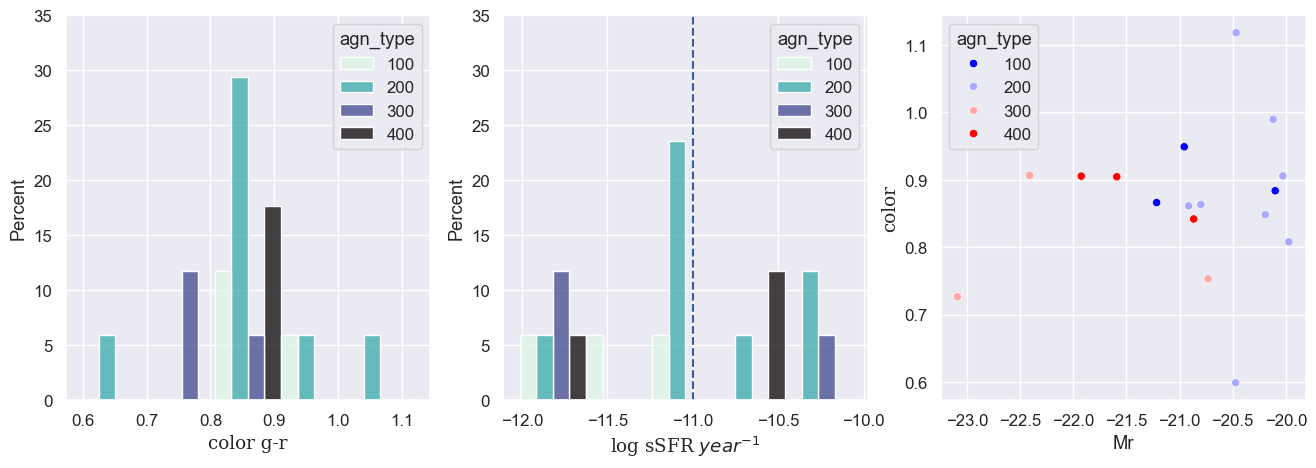

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))

sns.histplot(ax=axes[0], x=(df['Mg']-df['Mr']), hue=df['agn_type'], stat='percent', multiple='dodge', palette='mako_r', 
             edgecolor='white', bins=5)
axes[0].set_xlabel('color g-r', fontfamily='serif')
axes[0].set_ylim(0,35)


sns.histplot(ax=axes[1], x=df['sfrmst'], hue=df['agn_type'], stat='percent', multiple='dodge', palette='mako_r', 
             edgecolor='white', bins=5)
axes[1].set_xlabel('log sSFR $year^{-1}$', fontfamily='serif')
axes[1].vlines(-11, 0, 35, linestyle='--', color= colors[2], label='Wetzel+2012')
axes[1].set_ylim(0,35)


sns.scatterplot(ax = axes[2], x=df['Mr'], y=(df['Mg']-df['Mr']), hue=df['agn_type'], palette='bwr')
axes[2].set_ylabel('color', fontfamily='serif')


Text(0.5, 0, 'log([OIII])')

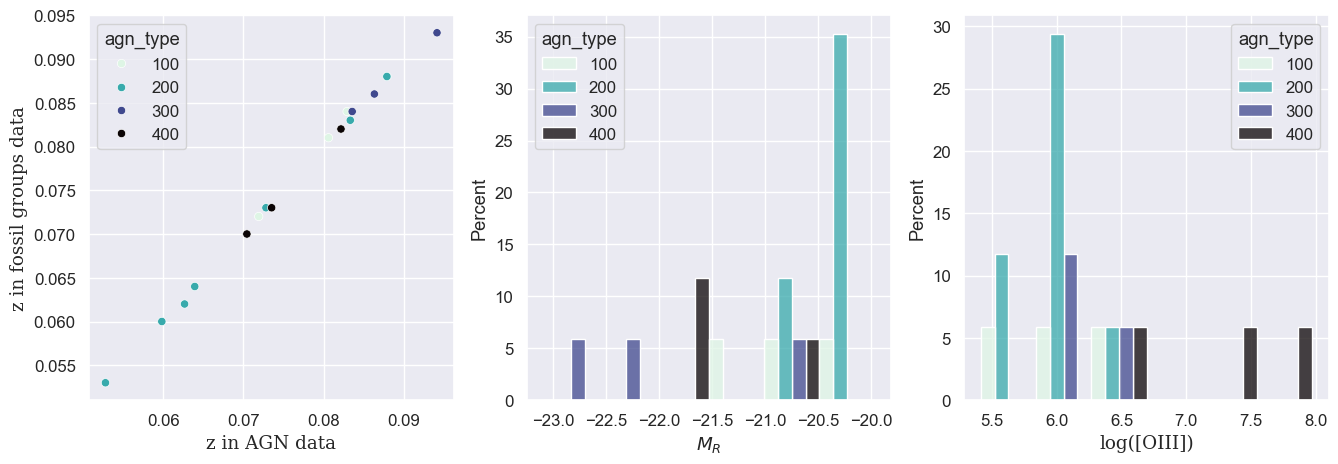

In [57]:

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=False)

sns.scatterplot(ax=axes[0], x=df['z_1'], y=df['z_2'], palette='mako_r', hue=df['agn_type'])
sns.histplot(ax=axes[1], x=df['Mr'], edgecolor='white',  palette='mako_r', hue=df['agn_type'], bins=6, stat='percent', multiple='dodge')
sns.histplot(ax=axes[2], x=df['LumOIII'], edgecolor='white',  palette='mako_r', hue=df['agn_type'], bins=6, stat='percent', multiple='dodge')

axes[0].set_xlabel('z in AGN data', fontfamily='serif')
axes[0].set_ylabel('z in fossil groups data', fontfamily='serif')

axes[1].set_xlabel('$M_{R}$')

axes[2].set_xlabel('log([OIII])', fontfamily='serif')

Text(0.5, 0, 'log Age')

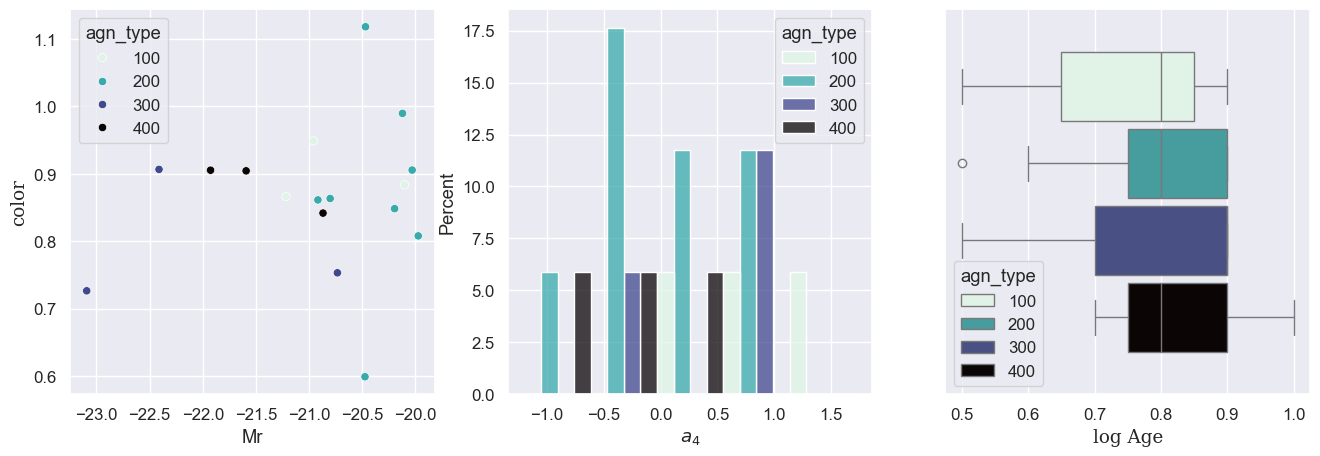

In [48]:
fig, axes = plt.subplots(1,3, figsize=(16,5))


sns.scatterplot(ax=axes[0], x=df['Mr'], y=(df['Mg']-df['Mr']), palette='mako_r', hue=df['agn_type'])
axes[0].set_ylabel('color', fontfamily='serif')
#sns.scatterplot(ax=axes[0], x=examplemags_r, y=gmsrs, color= colors[5])
#sns.scatterplot(ax=axes[0], x=df['nr'], y=df['n(g-r)'])
sns.histplot(ax=axes[1], x=df['a4'], hue=df['agn_type'], edgecolor='white', palette='mako_r', stat='percent', bins=5, multiple='dodge')
axes[1].set_xlabel('$a_{4}$', fontfamily='serif')

sns.boxplot(ax=axes[2], x=df['logAge'], hue=df['agn_type'],palette='mako_r', fill=True, gap=0.1, linecolor='#78777A')
axes[2].set_xlabel('log Age', fontfamily='serif')



In [59]:
df_2 = df.drop(columns=['PLATE', 'MJD', 'FIB', 'ra', 'dec', 'z_2', 'bpty', 'bptx', 'bptx2', 'bptx3', 'SN_Hbeta', 'SN_OIII',
                        'SN_OI', 'SN_Halpha', 'SN_NII', 'SN_SII6717', 'SN_SII6731','RAJ2000', 'DEJ2000','rMAG',  'g-r', 'dN', 
                        'gReff', 'rReff', 'ng', 'nr', 'n(g-r)', 'log(sig)', 'Flag', 'Separation', 'z_1', 'Mu', 'Mg', 'Mr', 'Mi',
                        'Mz', 'concind', 'sfr', 'recno', 'Seq','R', 'dCM', '[a/Fe]', 'LumOIII', 'logMBH', 'DM', 'a4'])

In [60]:
df_2.keys()

Index(['stmass', 'sfrmst', 'dn4000', 'agn_type', 'logLX', 'logAge', '[Z/H]'], dtype='object')

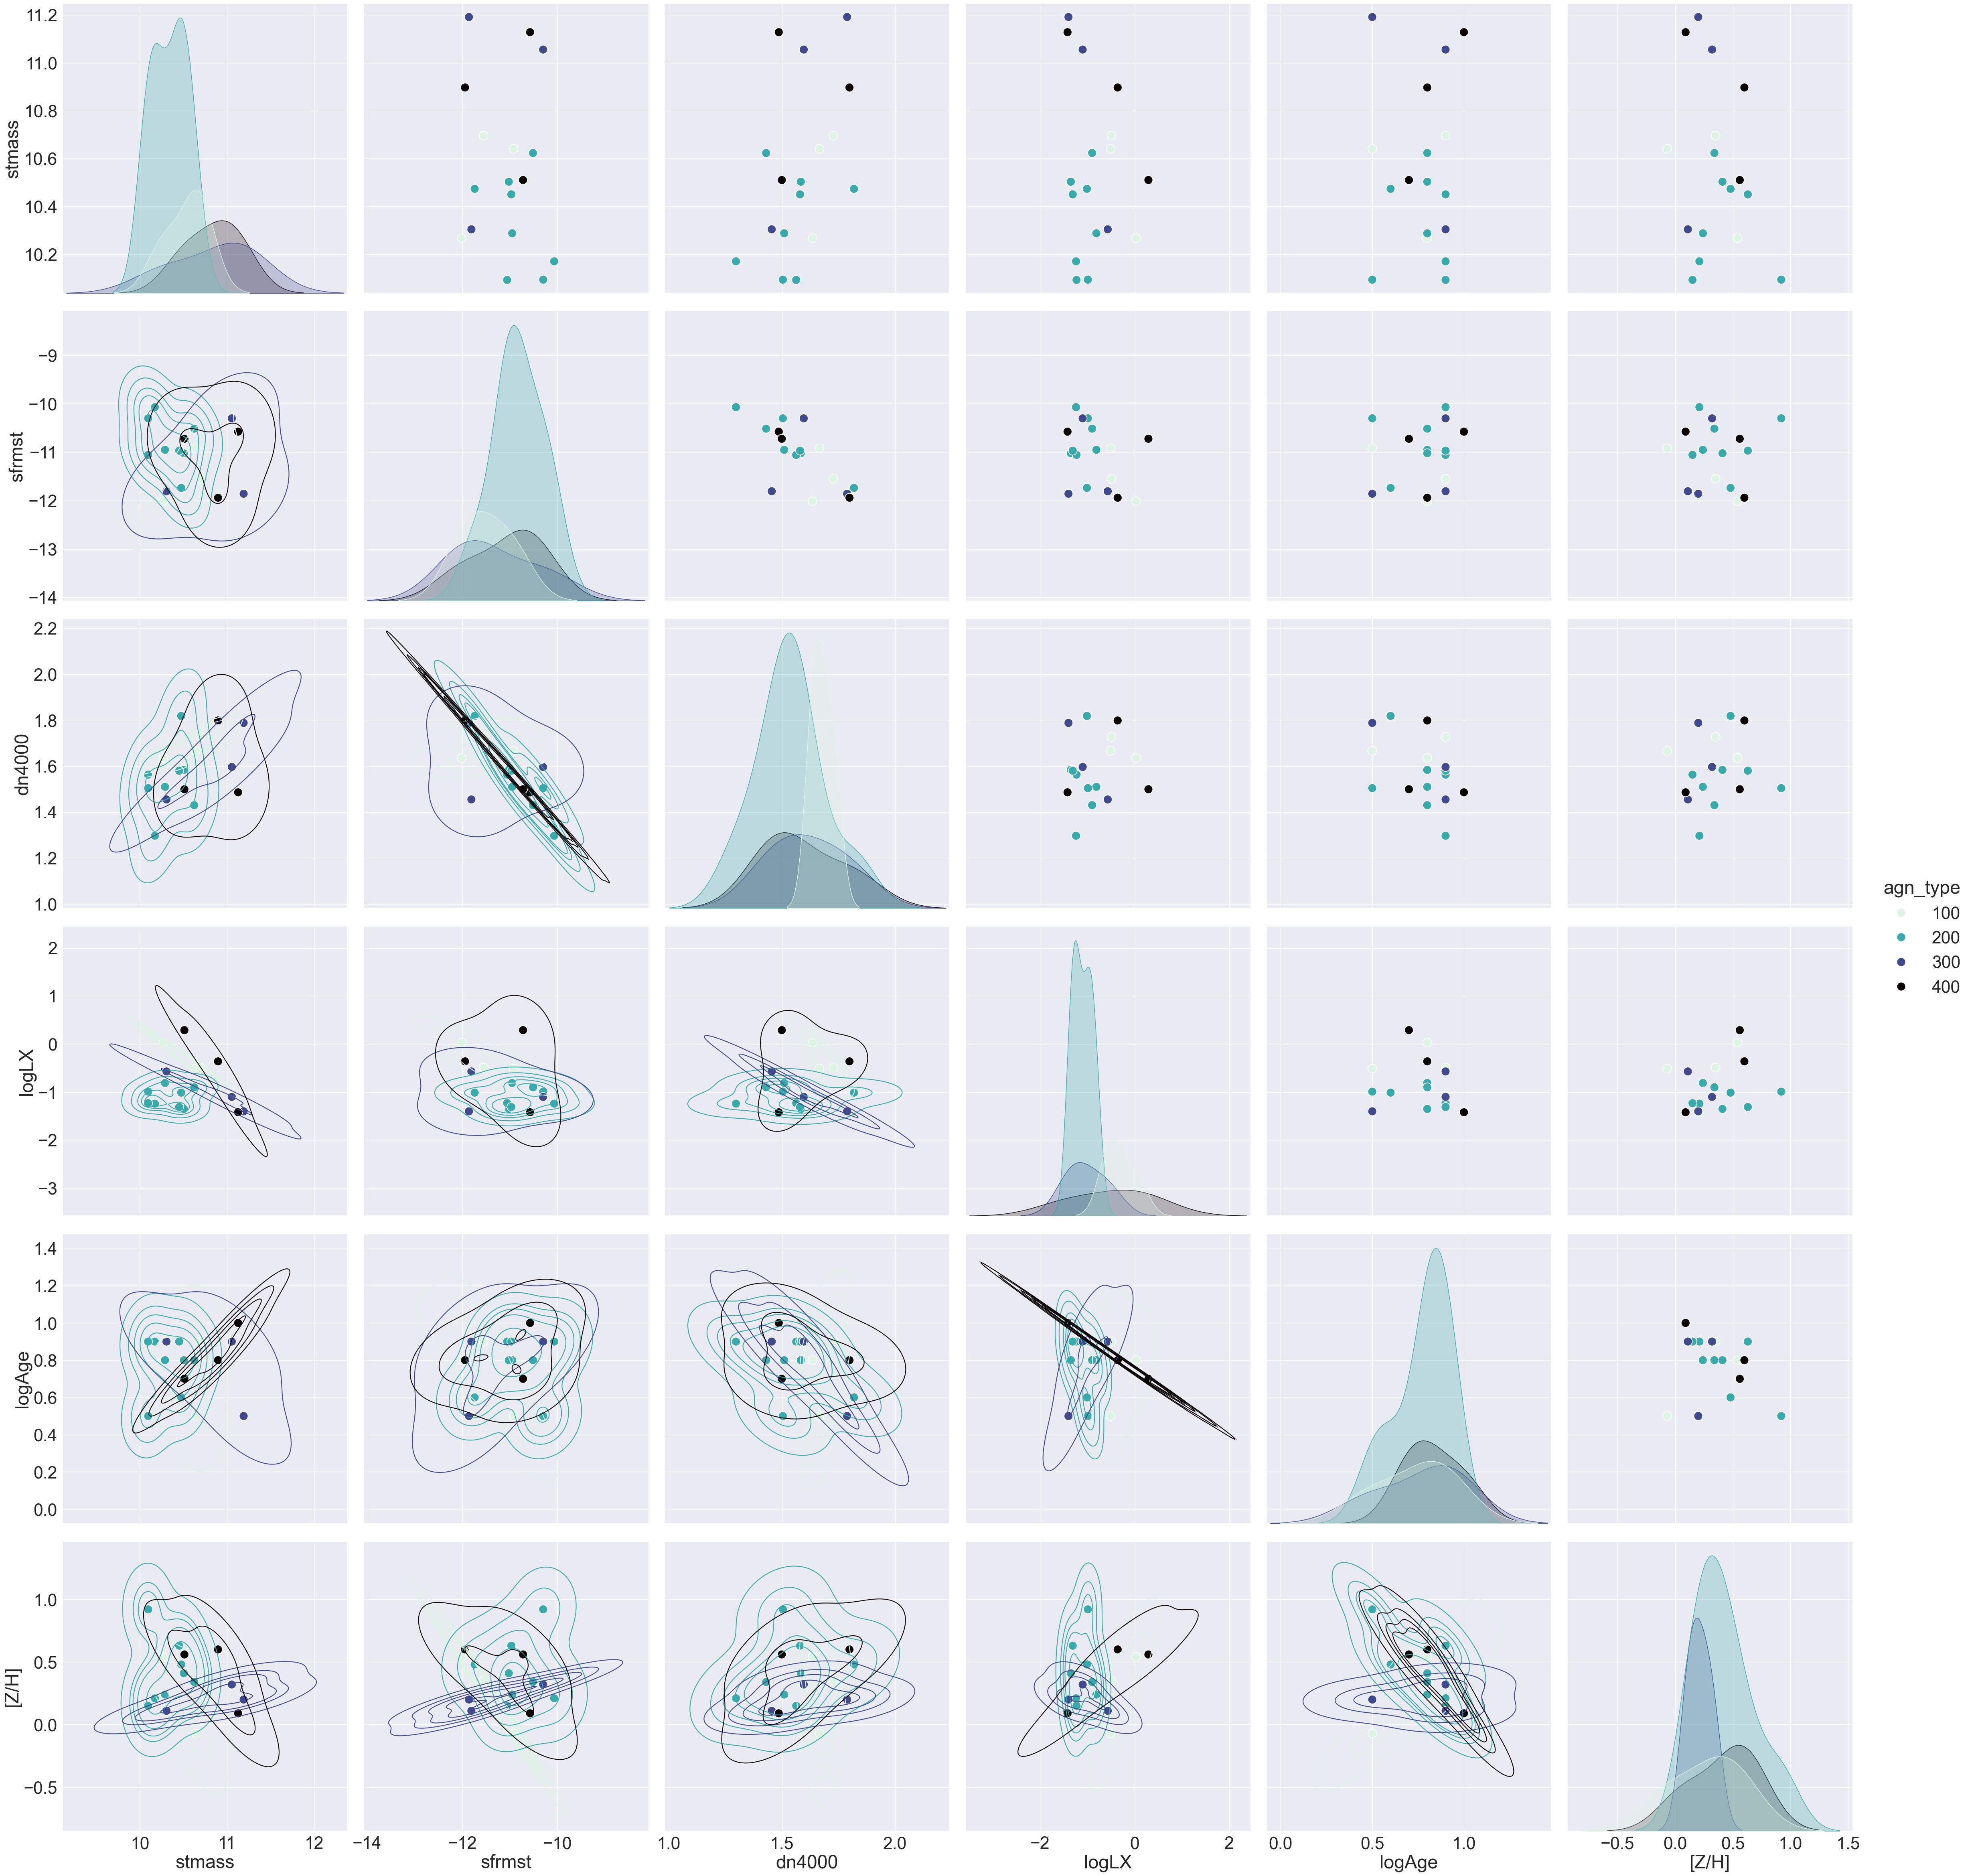

In [61]:
sns.set_theme(font_scale=2.8)
g = sns.pairplot(df_2, hue='agn_type', diag_kind='kde', palette='mako_r', height=8, markers='o', 
                 plot_kws = {"s":250})
g.map_lower(sns.kdeplot, levels=6)

<Axes: xlabel='logLX', ylabel='logAge'>

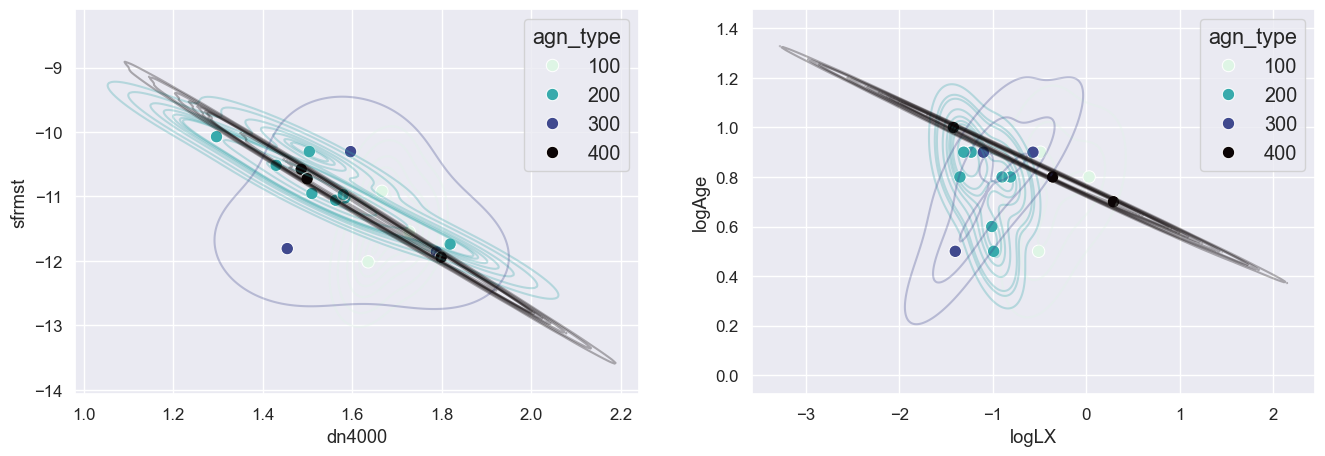

In [85]:
fig, axes = plt.subplots(1, 2, figsize=(16,5))
sns.set_theme(font_scale=1.3)

sns.kdeplot(ax=axes[0],
    data=df_2, x="dn4000", y="sfrmst", hue="agn_type", fill=False, palette='mako_r', alpha=0.3
)

sns.scatterplot(ax=axes[0], x=df_2['dn4000'], y=df_2['sfrmst'], palette='mako_r', hue=df['agn_type'], s=80)

sns.kdeplot(ax=axes[1],
    data=df_2, x="logLX", y="logAge", hue="agn_type", fill=False, palette='mako_r', alpha=0.3
)

sns.scatterplot(ax=axes[1], x=df_2['logLX'], y=df_2['logAge'], palette='mako_r', hue=df['agn_type'], s=80)
